## Plot CO<sub>2</sub> transport cost as function of transport distance and CO<sub>2</sub> amount

### import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# update plot formatting
mpl.rcParams.update({'font.size': 14})
mpl.rcParams.update({'mathtext.default': 'rm'})
mpl.rcParams.update({'font.family': 'sans-serif'})
mpl.rcParams.update({'font.sans-serif': 'Calibri'})

### constants

In [3]:
# molar mass (kg/kmol)
molar_mass_H2_kg_per_kmol = 2.016
molar_mass_CO2_kg_per_kmol = 44.009

# stoichiometric ratio (mol/mol)
stoic_mol_H2_per_mol_CO2 = 1.0

# kg per tonne
kg_per_tonne = 1000.0

# tonnes per kt
tonne_per_kt = 1000.0

# days per year
# implicit assumption: 100% capacity factor
day_per_yr = 365.0

### data processing

In [4]:
# read in CO2 transport cost ($/tCO2)
df = pd.read_csv('../inputs/liq_co2_trucking_costs.csv')

In [5]:
# pivot dataframe
df_pivot = df.pivot(
    columns='Distance (mi)',
    index=['Size (kt-CO2/y)'],
    values='Total ($/t-CO2 gross)',
)

df_pivot

Distance (mi),10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,1000.0
Size (kt-CO2/y),,,,,,,,,,,,,,,,,,,
0.398395,8096.371864,8097.693636,8099.015385,8100.337113,8101.658820,8102.980507,8104.347355,8105.666655,8106.986022,8108.305456,8121.503120,9300.069508,9313.261614,9326.493929,10501.222850,10514.435963,10527.656657,11702.471562,11767.062422
0.796790,4121.716022,4123.037820,4124.359590,4125.681332,4127.003046,4128.324733,4129.646394,4130.968028,4132.289637,4133.611221,4146.825781,4741.468606,4754.670487,4795.366787,5390.282248,5403.503292,5416.707531,6011.586446,6050.560475
1.195185,2783.758821,2785.079396,2786.399998,2787.720625,2789.041277,2790.361953,2791.682652,2793.003374,2794.324119,2795.644884,2808.840266,3210.198286,3241.786477,3254.992898,3656.520068,3686.821575,3700.031992,4101.628701,4132.070704
1.593580,2110.277688,2111.598717,2112.919746,2114.240777,2115.548722,2116.870353,2118.191983,2119.513611,2120.835238,2122.156863,2135.372958,2452.819201,2466.029022,2493.067625,2797.966882,2811.178004,2837.242829,3142.200045,3168.367632
1.991975,1704.064162,1705.385073,1706.705999,1708.026940,1709.347895,1710.668864,1711.989846,1713.310841,1714.622380,1715.944388,1739.313955,1986.078670,2010.369785,2023.572769,2280.746275,2293.954695,2317.478126,2564.433367,2588.041508
2.390370,1432.068434,1433.389710,1434.710976,1436.032232,1437.353478,1438.662107,1439.984037,1441.305958,1442.627872,1443.949777,1465.631271,1673.713989,1696.172973,1717.932930,1926.158805,1947.957942,1969.795363,2178.096845,2199.988890
2.788765,1237.043706,1238.364781,1239.685855,1241.006929,1242.328002,1243.649074,1244.970146,1246.291218,1247.612290,1248.933361,1269.397064,1457.808827,1471.018987,1491.550447,1679.514878,1700.114686,1713.321127,1901.427459,1922.079872
3.187160,1090.278470,1091.599120,1092.919836,1094.240613,1095.561448,1096.882339,1098.203282,1099.524274,1100.845313,1102.166396,1121.733240,1287.893335,1308.063681,1327.708673,1494.054336,1507.274108,1526.954479,1693.430763,1713.183635
3.585555,975.785767,977.107098,978.428422,979.749739,981.071049,982.392351,983.713648,985.034938,986.356222,987.682735,1006.541949,1155.875049,1175.286751,1194.209618,1343.716283,1362.697716,1381.678845,1530.755157,1549.782634


In [6]:
# output min. and max. costs ($/tCO2)
(df_pivot.min(axis='columns').min(), 
 df_pivot.max(axis='columns').max())

(210.1540713446, 11767.06242203061)

In [7]:
# transport distance (mile) and CO2 amount (kt/yr) to plot
dist_mi = np.array(df_pivot.columns)
size_kt_co2_per_yr = np.array(df_pivot.index)

In [8]:
dist_mi

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,
        100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])

In [9]:
size_kt_co2_per_yr

array([ 0.39839497,  0.79678993,  1.1951849 ,  1.59357986,  1.99197483,
        2.39036979,  2.78876476,  3.18715972,  3.58555469,  3.98394965,
        4.38234462,  4.78073958,  5.17913455,  5.57752951,  5.97592448,
        6.37431944,  6.77271441,  7.17110938,  7.56950434,  7.96789931,
        8.76468924,  9.56147917, 10.3582691 , 11.15505903, 11.95184896,
       12.74863889, 13.54542882, 14.34221875, 15.13900868, 15.93579861,
       16.73258854, 17.52937847, 18.3261684 , 19.12295833, 19.91974826])

In [10]:
# calculate hydrogen refueling station capacity (kg/day)
# assuming perfect reactions, no losses, etc.
stn_cap_kg_H2_per_day = size_kt_co2_per_yr / \
    day_per_yr * tonne_per_kt * kg_per_tonne / \
    molar_mass_CO2_kg_per_kmol * molar_mass_H2_kg_per_kmol  * \
    stoic_mol_H2_per_mol_CO2

stn_cap_kg_H2_per_day

array([  50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,  450.,
        500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,  900.,
        950., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
       1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500.])

In [11]:
# filter hydrogen refueling station capacity
# for zoomed in plot

idx_filtered = np.where(stn_cap_kg_H2_per_day >= 499.0)

stn_cap_kg_H2_per_day_filtered = \
    stn_cap_kg_H2_per_day[idx_filtered]

stn_cap_kg_H2_per_day_filtered

array([ 500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,  900.,
        950., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
       1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500.])

In [12]:
# filter CO2 amount (kt/yr) 
size_kt_co2_per_yr_filtered = df_pivot.index[idx_filtered]

size_kt_co2_per_yr_filtered

Index([3.9839496527777776,  4.382344618055556,  4.780739583333333,
        5.179134548611112,  5.577529513888889,  5.975924479166667,
        6.374319444444445,  6.772714409722222,        7.171109375,
        7.569504340277779,  7.967899305555555,  8.764689236111112,
        9.561479166666668, 10.358269097222225, 11.155059027777778,
       11.951848958333334,  12.74863888888889, 13.545428819444444,
              14.34221875, 15.139008680555555,  15.93579861111111,
       16.732588541666665, 17.529378472222223,  18.32616840277778,
       19.122958333333333, 19.919748263888888],
      dtype='float64', name='Size (kt-CO2/y)')

In [13]:
# filter CO2 transport cost ($/tCO2)
df_pivot_filtered = df_pivot.loc[
    df_pivot.index.isin(size_kt_co2_per_yr_filtered)
]

df_pivot_filtered

Distance (mi),10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,1000.0
Size (kt-CO2/y),,,,,,,,,,,,,,,,,,,
3.983950,883.937623,885.264168,886.584089,887.901151,889.222225,890.549342,891.863933,893.183935,894.511301,900.920573,919.221958,1055.138908,1073.944751,1092.307057,1228.378110,1246.788001,1265.204819,1400.878352,1419.337611
4.382345,808.597208,809.922001,811.244539,812.560478,813.880688,815.206192,816.527662,817.849116,823.797761,825.119149,842.960857,967.865915,986.160246,1004.059271,1129.110143,1151.328077,1169.277394,1294.440980,1312.436380
4.780740,745.665090,746.990177,748.311329,749.627117,750.953008,752.270087,753.590655,759.158417,760.479523,761.796094,779.263355,894.985188,917.159012,934.681494,1050.563786,1067.696782,1089.608963,1205.601043,1231.099936
5.179135,692.297337,693.618468,694.939567,696.260639,697.581694,698.902738,700.223777,705.462223,706.781715,708.105051,725.244667,837.154472,854.331504,871.517883,983.602382,1000.830233,1018.060342,1137.618286,1154.894789
5.577530,646.453263,647.774607,649.095956,650.417308,651.738660,653.060010,658.020967,659.342296,660.663617,661.987300,678.843461,783.821219,800.717486,821.309435,922.757228,943.423576,960.377856,1072.492980,1089.486309
5.975924,606.646175,607.966962,609.287813,610.608725,611.929691,613.250710,617.969597,619.290769,620.611973,621.933208,641.960292,737.517362,757.608141,774.274323,873.417668,893.603693,916.619851,1015.975568,1032.350732
6.374319,571.751253,573.072304,574.393367,575.714443,577.035529,581.541006,582.862536,584.184032,585.505495,586.826928,606.429140,700.158722,716.603149,736.287905,830.187182,852.579388,872.368970,966.112612,982.646801
6.772714,540.902228,542.223532,543.544829,544.866119,546.187401,550.508757,551.833004,553.153936,554.474886,555.795855,575.020647,664.108500,683.406670,699.667901,788.912666,813.860599,833.280301,922.394902,938.744425
7.171109,513.438973,514.759408,516.080522,517.401640,518.722762,522.874951,524.196329,525.517696,526.839053,528.160399,547.058509,632.013770,650.978618,669.959725,760.340209,779.404207,798.489270,883.502010,899.346962


### plot

In [14]:
# min. and max. levels for contour plot
vmin = np.floor(df_pivot_filtered.min().min() / 100) * 100
vmax = np.ceil(df_pivot_filtered.max().max() / 100) * 100

(vmin, vmax)

(200.0, 1500.0)

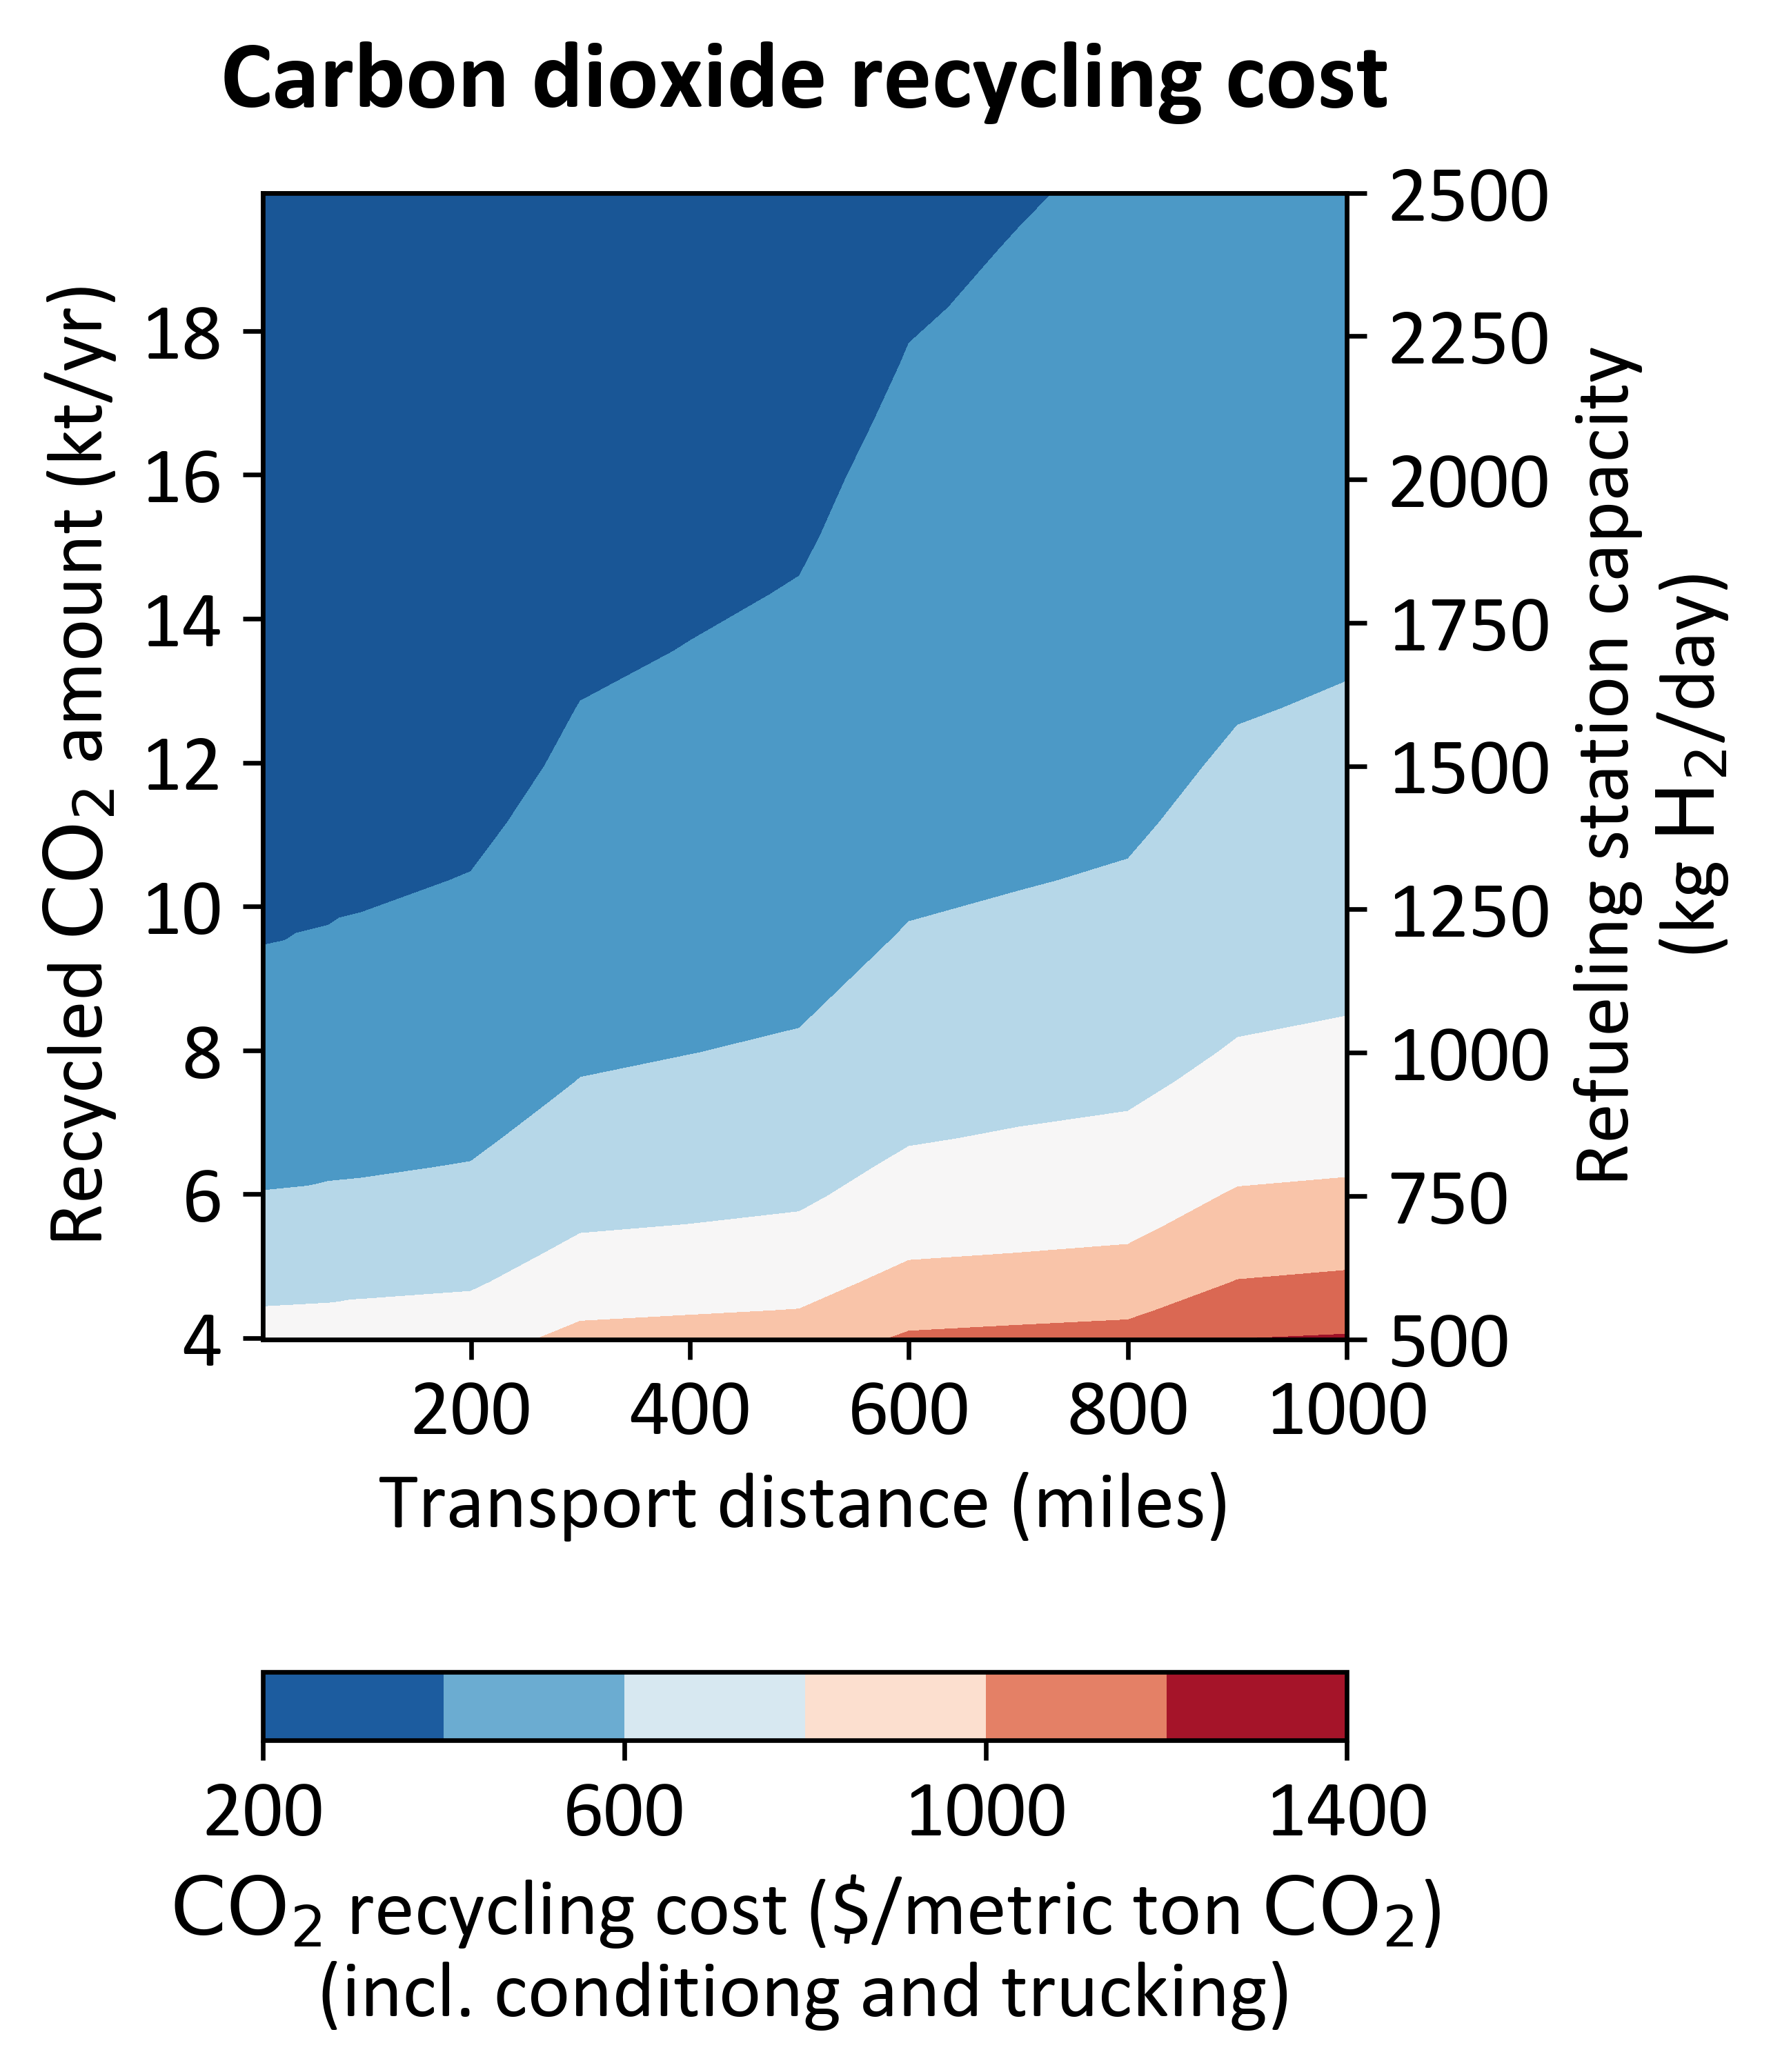

In [15]:
# set up plot
fig, ax = plt.subplots(
    figsize=(4.5, 5.3),
    sharex=True,
    dpi=600,
    layout='tight'
)

# fill subplots
cm0 = ax.contourf(
    dist_mi,
    size_kt_co2_per_yr_filtered,
    df_pivot_filtered,
    cmap='RdBu_r',
    levels=np.arange(vmin, vmax+1, 200),
)

# add axis labels
ax.set_xlabel('Transport distance (miles)')
ax.set_ylabel('Recycled ${CO_2}$ amount (kt/yr)')

# set x-axis limits and ticks
ax.set_xticks(np.arange(0, dist_mi.max()+0.1, 200))
ax.set_xlim(dist_mi.min(), dist_mi.max())

# set y-axis limits and ticks
ax.set_yticks(np.arange(
    0,
    size_kt_co2_per_yr_filtered.max()+0.1,
    2))
ax.set_ylim(
    size_kt_co2_per_yr_filtered.min(),
    size_kt_co2_per_yr_filtered.max()
)

# add plot title
ax.set_title(
    'Carbon dioxide recycling cost',
    fontweight='bold',
    pad=15
    )
    
# add colorbar
cbar = fig.colorbar(
    cm0, 
    cax=ax.inset_axes([0, -0.35, 1, 0.06]),
    orientation='horizontal',
    label='${CO_2}$ recycling cost '
        '(\\$/metric ton ${CO_2}$)' + '\n(incl. conditiong and trucking)',
    ticks=np.arange(vmin, vmax+1, 400)
)

# add secondary axis
ax2=ax.twinx()
ax2.contourf(
    dist_mi,
    stn_cap_kg_H2_per_day_filtered,
    df_pivot_filtered,
    cmap='RdBu_r',
)
ax2.set_yticks(np.arange(
    0, 
    stn_cap_kg_H2_per_day_filtered.max()+0.1,
    250))
ax2.set_ylim(
    stn_cap_kg_H2_per_day_filtered.min(), 
    stn_cap_kg_H2_per_day_filtered.max(),
)
ax2.set_ylabel('Refueling station capacity\n(kg ${H_2}$/day)')

# save plot
plt.savefig(
    'CO2 recycling cost.png',
    bbox_inches='tight'
    )

plt.show()